# **Semantic Segmentation - Data Exploration**

* Emanuele Masiero (872695)
* Simone Vendramini (866229)
* Tommaso Ferrario (869005)

[Competition Link](https://www.kaggle.com/competitions/open-cv-tf-project-3-image-segmentation-round-3)


Dataset:
> M. Rahnemoonfar, T. Chowdhury, A. Sarkar, D. Varshney, M. Yari and R. R. Murphy, "FloodNet: A High Resolution Aerial Imagery Dataset for Post Flood Scene Understanding," in IEEE Access, vol. 9, pp. 89644-89654, 2021, doi: 10.1109/ACCESS.2021.3090981.

## **Imports and Paths**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt


# Add the parent directory to the path so we can import the module
sys.path.append("/content/drive/MyDrive/Colab Notebooks/Progetto AML/src")

from tqdm import tqdm
from torch.utils.data import DataLoader
from FloodNetDataset import FloodNetDataset
from Plots import plot_image, plot_tensor, plot_one_hot_label

## **Utils**

### **Variables**

In [3]:
batch_size = 1

baseline_path = "/content/drive/MyDrive/Colab Notebooks/Progetto AML/FloodNet-Supervised_v2.0_compressed"

specific_path = {
    "train": {"img": "train/train-org-img", "label": "ColorMasks-TrainSet"},
    "val": {"img": "val/val-org-img", "label": "ColorMasks-ValSet"},
    "test": {"img": "test/test-org-img", "label": "ColorMasks-TestSet"},
    "augmented": {"img": "train_augmented/imgs", "label": "train_augmented/labels"},
}

In [4]:
classes = {
    0: "background",
    1: "building-flooded",
    2: "building-not-flooded",
    3: "road-flooded",
    4: "road-not-flooded",
    5: "water",
    6: "tree",
    7: "vehicle",
    8: "pool",
    9: "grass",
}

color_to_label_map = {
    (0, 0, 0): 0,
    (0, 0, 255): 1,
    (120, 120, 180): 2,
    (20, 150, 160): 3,
    (140, 140, 140): 4,
    (250, 230, 61): 5,
    (255, 82, 0): 6,
    (245, 0, 255): 7,
    (0, 235, 255): 8,
    (7, 250, 4): 9,
}

label_to_color_map = {v: k for k, v in color_to_label_map.items()}

## **Dataset Loading**

In [ ]:
data = FloodNetDataset(
    os.path.join(baseline_path, specific_path["train"]["label"]),
    os.path.join(baseline_path, specific_path["train"]["img"]),
)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=False)

## **Data Exploration**

Let's start by loading the dataset and exploring the images and masks.

In [ ]:
figure = plt.figure(figsize=(20, 10))
cols, rows = 5, 2

for i in range(1, cols + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx]

    image_name = data.images[sample_idx]
    label_name = data.labels[sample_idx]

    # Original image (first row)
    figure.add_subplot(rows, cols, i)
    plt.title(f"Sample {image_name}")
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0), cmap="gray")

    # Label image (second row)
    figure.add_subplot(rows, cols, i + cols)
    plt.title(f"Label {label_name}")
    plt.axis("off")
    plt.imshow(label.permute(1, 2, 0), cmap="viridis")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range(10):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx]
    plot_image(img, label)

Output hidden; open in https://colab.research.google.com to view.

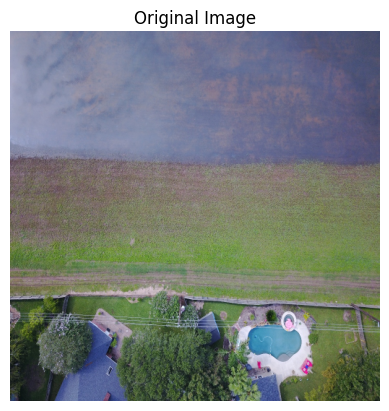

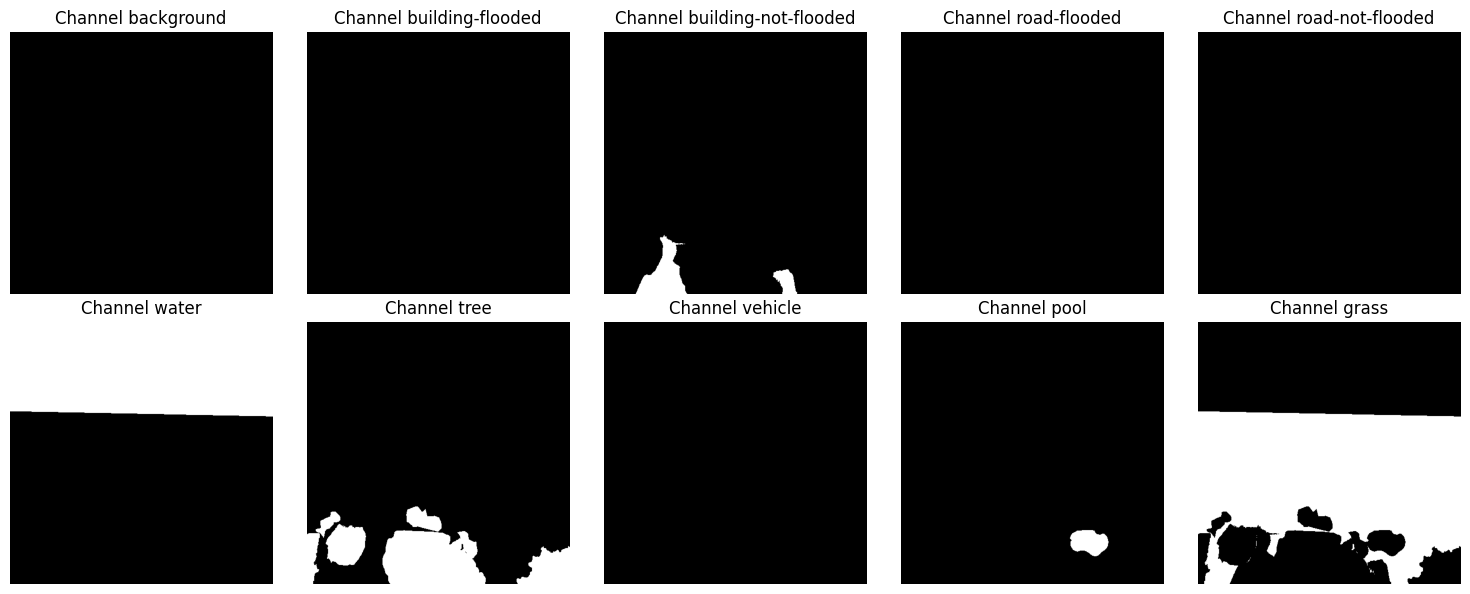

In [ ]:
image, label_onehot = data[126]
plot_tensor(image, 'Original Image')
plot_one_hot_label(label_onehot)

In [10]:
counts_per_channel = torch.zeros(10, dtype=torch.float32)
distribution_np = np.array(
    [
        0.01628821,
        0.0160033,
        0.03229699,
        0.0286516,
        0.05515117,
        0.10889202,
        0.17433174,
        0.00179433,
        0.00204381,
        0.5645469,
    ]
)

skip = True

if not skip:
    for i in tqdm(range(len(data))):
        image, label_onehot = data[i]
        counts_per_channel += torch.sum(label_onehot, dim=(0, 1))

    total_count = counts_per_channel.sum()
    distribution = counts_per_channel / total_count

    distribution_np = distribution.numpy()

In [11]:
plt.style.use("ggplot")

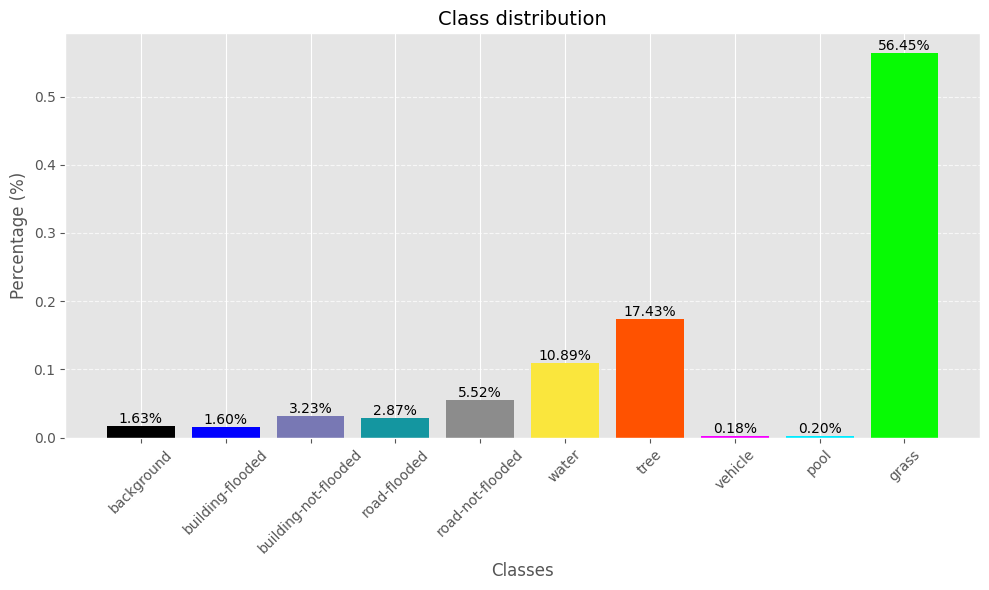

In [12]:
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in color_to_label_map.keys()]

plt.figure(figsize=(10, 6))
bars = plt.bar(
    list(color_to_label_map.values()), distribution_np, color=colors, edgecolor="none"
)

for bar, percentage in zip(bars, distribution_np):
    height = bar.get_height()
    percentage = percentage * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{percentage:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.title("Class distribution", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(list(classes.keys()), list(classes.values()), rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [5]:
data = FloodNetDataset(
    os.path.join(baseline_path, specific_path["augmented"]["label"]),
    os.path.join(baseline_path, specific_path["augmented"]["img"]),
)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=False)

In [13]:
counts_per_channel = torch.zeros(10, dtype=torch.float32)
distribution_np = np.array(
    [0.06424644,
     0.02948655,
     0.05158602,
     0.04471621,
     0.06570628,
     0.11432764,
     0.18429036,
     0.00330005,
     0.00382967,
     0.43851078]
)

skip = True

if not skip:
    for i in tqdm(range(len(data))):
        image, label = data[i]
        label = label.type(torch.LongTensor)

        label_onehot = torch.nn.functional.one_hot(label, num_classes=10)
        label_onehot = label_onehot.type(torch.float32)
        counts_per_channel += torch.sum(label_onehot, dim=(0, 1, 2))

    total_count = counts_per_channel.sum()
    distribution = counts_per_channel / total_count

    distribution_np = distribution.numpy()

In [14]:
distribution_np

array([0.06424644, 0.02948655, 0.05158602, 0.04471621, 0.06570628,
       0.11432764, 0.18429036, 0.00330005, 0.00382967, 0.43851078])

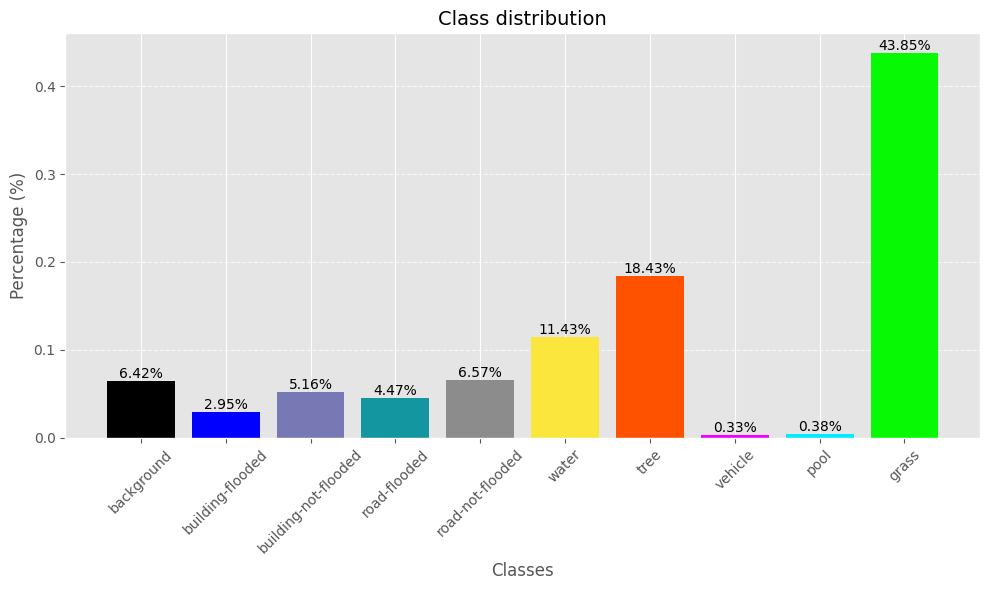

In [15]:
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in color_to_label_map.keys()]

plt.figure(figsize=(10, 6))
bars = plt.bar(
    list(color_to_label_map.values()), distribution_np, color=colors, edgecolor="none"
)

for bar, percentage in zip(bars, distribution_np):
    height = bar.get_height()
    percentage = percentage * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{percentage:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.title("Class distribution", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(list(classes.keys()), list(classes.values()), rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()